In [0]:
%pip install scikit-learn

java.lang.IllegalStateException: jupyter client is not available because the python kernel is not defined. The kernel may be restarting or the repl may have been shut down.
	at com.databricks.backend.daemon.driver.JupyterDriverLocal.$anonfun$getJupyterKernelListener$1(JupyterDriverLocal.scala:344)
	at scala.Option.getOrElse(Option.scala:189)
	at com.databricks.backend.daemon.driver.JupyterDriverLocal.com$databricks$backend$daemon$driver$JupyterDriverLocal$$getJupyterKernelListener(JupyterDriverLocal.scala:343)
	at com.databricks.backend.daemon.driver.JupyterDriverLocal.executePython(JupyterDriverLocal.scala:612)
	at com.databricks.backend.daemon.driver.JupyterDriverLocal.repl(JupyterDriverLocal.scala:574)
	at com.databricks.backend.daemon.driver.DriverLocal.$anonfun$execute$27(DriverLocal.scala:929)
	at com.databricks.unity.EmptyHandle$.runWith(UCSHandle.scala:125)
	at com.databricks.backend.daemon.driver.DriverLocal.$anonfun$execute$24(DriverLocal.scala:920)
	at com.databricks.logging.UsageLogging.$anonfun$withAttributionContext$1(UsageLogging.scala:414)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.AttributionContext$.withValue(AttributionContext.scala:158)
	at com.databricks.logging.UsageLogging.withAttributionContext(UsageLogging.scala:412)
	at com.databricks.logging.UsageLogging.withAttributionContext$(UsageLogging.scala:409)
	at com.databricks.backend.daemon.driver.DriverLocal.withAttributionContext(DriverLocal.scala:77)
	at com.databricks.logging.UsageLogging.withAttributionTags(UsageLogging.scala:457)
	at com.databricks.logging.UsageLogging.withAttributionTags$(UsageLogging.scala:442)
	at com.databricks.backend.daemon.driver.DriverLocal.withAttributionTags(DriverLocal.scala:77)
	at com.databricks.backend.daemon.driver.DriverLocal.execute(DriverLocal.scala:889)
	at com.databricks.backend.daemon.driver.DriverWrapper.$anonfun$tryExecutingCommand$2(DriverWrapper.scala:719)
	at scala.util.Try$.apply(Try.scala:213)
	at com.databricks.backend.daemon.driver.DriverWrapper.$anonfun$tryExecutingCommand$1(DriverWrapper.scala:711)
	at com.databricks.backend.daemon.driver.DriverWrapper.tryExecutingCommand(DriverWrapper.scala:739)
	at com.databricks.backend.daemon.driver.DriverWrapper.executeCommandAndGetError(DriverWrapper.scala:628)
	at com.databricks.backend.daemon.driver.DriverWrapper.executeCommand(DriverWrapper.scala:663)
	at com.databricks.backend.daemon.driver.DriverWrapper.runInnerLoop(DriverWrapper.scala:499)
	at com.databricks.backend.daemon.driver.DriverWrapper.runInner(DriverWrapper.scala:438)
	at com.databricks.backend.daemon.driver.DriverWrapper.run(DriverWrapper.scala:262)
	at java.lang.Thread.run(Thread.java:750)

In [0]:
import matplotlib.pyplot as plt
import numpy as np

def prepare_plot(xticks, yticks, figsize=(10.5, 6), hide_labels=False, grid_color='#999999',
                 grid_width=1.0):
    """Template for generating the plot layout."""
    plt.close()
    fig, ax = plt.subplots(figsize=figsize, facecolor='white', edgecolor='white')
    ax.axes.tick_params(labelcolor='#999999', labelsize='10')
    for axis, ticks in [(ax.get_xaxis(), xticks), (ax.get_yaxis(), yticks)]:
        axis.set_ticks_position('none')
        axis.set_ticks(ticks)
        axis.label.set_color('#999999')
        if hide_labels: axis.set_ticklabels([])
    plt.grid(color=grid_color, linewidth=grid_width, linestyle='-')
    map(lambda position: ax.spines[position].set_visible(False), ['bottom', 'top', 'left', 'right'])
    return fig, ax

def create_2D_gaussian(mn, variance, cov, n):
    """Randomly sample points from a two-dimensional Gaussian distribution"""
    np.random.seed(142)
    return np.random.multivariate_normal(np.array([mn, mn]), np.array([[variance, cov], [cov, variance]]), n)

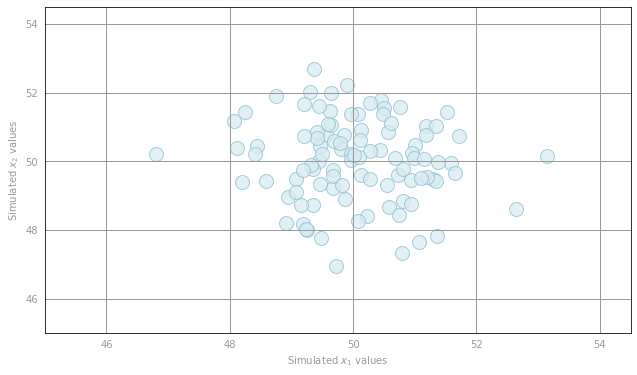

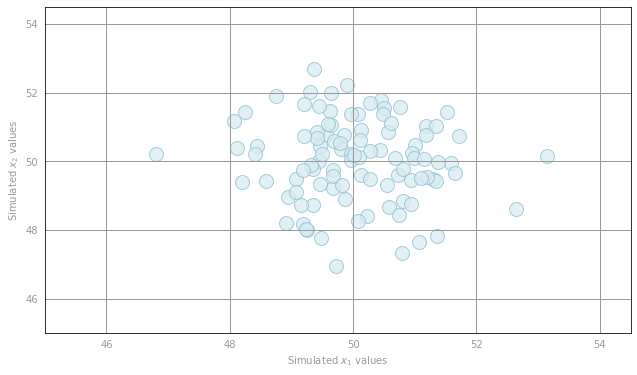

In [0]:
data_random = create_2D_gaussian(mn=50, variance=1, cov=0, n=100)

# generate layout and plot data
fig, ax = prepare_plot(np.arange(46, 55, 2), np.arange(46, 55, 2))
ax.set_xlabel(r'Simulated $x_1$ values'), ax.set_ylabel(r'Simulated $x_2$ values')
ax.set_xlim(45, 54.5), ax.set_ylim(45, 54.5)
plt.scatter(data_random[:,0], data_random[:,1], s=14**2, c='#d6ebf2', edgecolors='#8cbfd0', alpha=0.75)
display(fig)

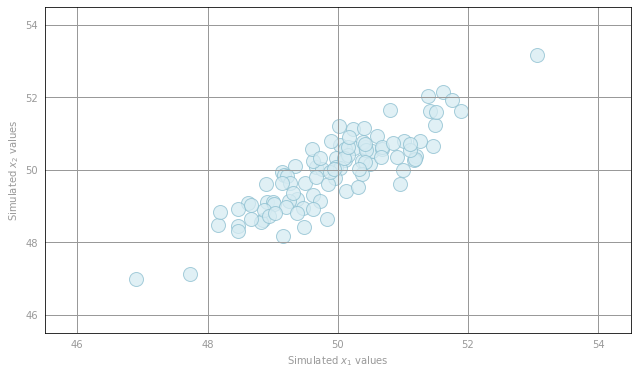

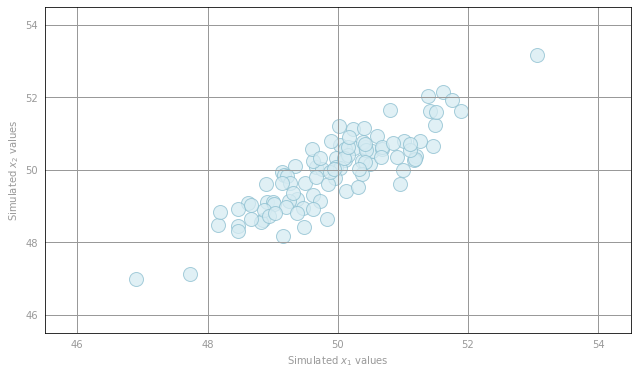

In [0]:
data_correlated = create_2D_gaussian(mn=50, variance=1, cov=.9, n=100)

# generate layout and plot data
fig, ax = prepare_plot(np.arange(46, 55, 2), np.arange(46, 55, 2))
ax.set_xlabel(r'Simulated $x_1$ values'), ax.set_ylabel(r'Simulated $x_2$ values')
ax.set_xlim(45.5, 54.5), ax.set_ylim(45.5, 54.5)
plt.scatter(data_correlated[:,0], data_correlated[:,1], s=14**2, c='#d6ebf2',
            edgecolors='#8cbfd0', alpha=0.75)
display(fig)

(1a) Interpreting PCA

In [0]:
# TODO: Replace <FILL IN> with appropriate code
correlated_data = sc.parallelize(data_correlated)


mean_correlated = correlated_data.mean()

correlated_data_zero_mean = correlated_data.map(lambda x: x-mean_correlated)

print(mean_correlated)
print(correlated_data.take(1))
print(correlated_data_zero_mean.take(1))


[49.95739037 49.97180477]
[array([49.6717712 , 50.07531969])]
[array([-0.28561917,  0.10351492])]


In [0]:
%pip install scikit-learn umap-learn matplotlib seaborn tensorflow



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/databricks/python_shell/scripts/db_ipykernel_launcher.py", line 83, in <module>
    app.shell.run_line_magic("matplotlib", "inline")
  File "/databricks/python/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2309, in run_line_magic
    result = fn(*args, **kwargs)
  File "/databricks/python/lib/python3.9/site-packages/IPython/core/magics/pylab.py", line 99, in matplotlib
    gui, backend = self.shell.enable_matplotlib(args.gui.lower() if isinstance(args.gui, str) else args.gui)
  File "/databri

In [0]:
from sklearn.datasets import load_wine
import pandas as pd

# Load the Wine dataset
wine = load_wine()
X = wine.data  # Features
y = wine.target  # Labels

# Convert to DataFrame for easier handling
df = pd.DataFrame(X, columns=wine.feature_names)
df['label'] = y

# Standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the first few rows
df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


a. Locally Linear Embedding (LLE)

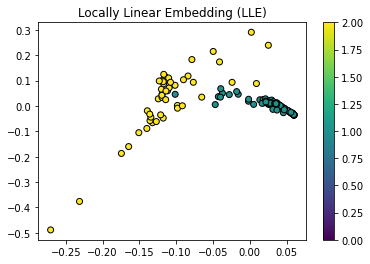

In [0]:
from sklearn.manifold import LocallyLinearEmbedding
import matplotlib.pyplot as plt

lle = LocallyLinearEmbedding(n_components=2)
X_lle = lle.fit_transform(X_scaled)

plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.colorbar()
plt.title('Locally Linear Embedding (LLE)')
plt.show()


b. t-SNE with Interactive Visualization

/databricks/python/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/databricks/python/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


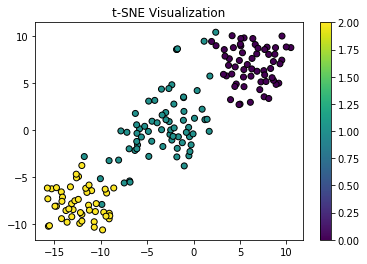

In [0]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.colorbar()
plt.title('t-SNE Visualization')
plt.show()


In [0]:
import plotly.express as px

fig = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], color=y.astype(str),
                 labels={'color': 'Class'}, title='t-SNE Interactive Visualization')
fig.show()

c. ISOMAP

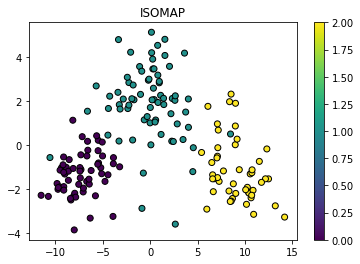

In [0]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X_scaled)

plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.colorbar()
plt.title('ISOMAP')
plt.show()


d. UMAP with Interactive Visualization

In [0]:
%pip install umap-learn

Python interpreter will be restarted.
  Using cached umap_learn-0.5.7-py3-none-any.whl (88 kB)
  Using cached pynndescent-0.5.13-py3-none-any.whl (56 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
  Using cached numba-0.60.0-cp39-cp39-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.7 MB)
  Using cached numpy-2.0.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.5 MB)
  Using cached llvmlite-0.43.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (43.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Not uninstalling numpy at /databricks/python3/lib/python3.9/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-37037407-bc69-41cc-995d-6793eb5d705f
    Can't uninstall 'numpy'. No files were found to uninstall.
Python interpreter will be restarted.


In [0]:
from sklearn.datasets import load_wine

# Load the Wine dataset
wine = load_wine()
X = wine.data  # Feature matrix
y = wine.target  # Target labels


In [0]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

In [0]:
import plotly.express as px

In [0]:
import umap

umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X_scaled)

fig = px.scatter(x=X_umap[:, 0], y=X_umap[:, 1], color=y.astype(str),
                 labels={'color': 'Class'}, title='UMAP Interactive Visualization')
fig.show()


/local_disk0/.ephemeral_nfs/envs/pythonEnv-37037407-bc69-41cc-995d-6793eb5d705f/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Multidimensional Scaling (MDS)

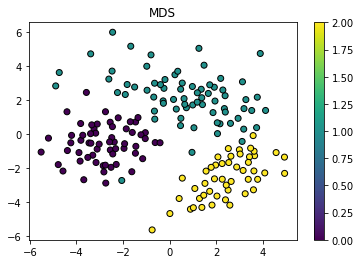

In [0]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_scaled)

plt.scatter(X_mds[:, 0], X_mds[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.colorbar()
plt.title('MDS')
plt.show()


f. Randomized PCA

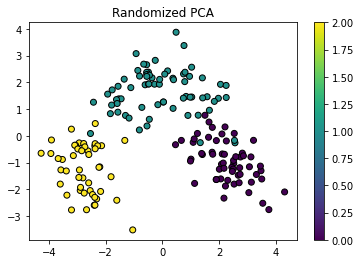

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42, svd_solver='randomized')
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.colorbar()
plt.title('Randomized PCA')
plt.show()


Kernel PCA

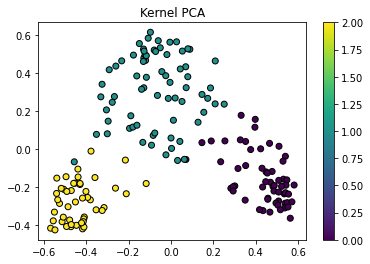

In [0]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_scaled)

plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.colorbar()
plt.title('Kernel PCA')
plt.show()


Incremental PCA

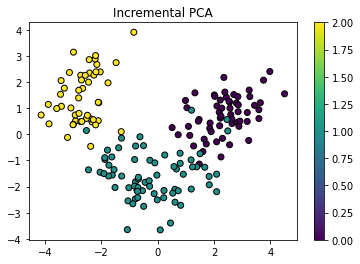

In [0]:
from sklearn.decomposition import IncrementalPCA

ipca = IncrementalPCA(n_components=2)
X_ipca = ipca.fit_transform(X_scaled)

plt.scatter(X_ipca[:, 0], X_ipca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.colorbar()
plt.title('Incremental PCA')
plt.show()


Factor Analysis

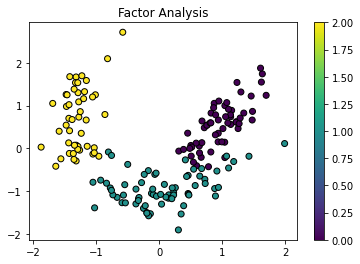

In [0]:
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=2, random_state=42)
X_fa = fa.fit_transform(X_scaled)

plt.scatter(X_fa[:, 0], X_fa[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.colorbar()
plt.title('Factor Analysis')
plt.show()


In [0]:
# TODO: Replace <FILL IN> with appropriate code
# Compute the covariance matrix using outer products and correlated_data_zero_mean
#correlated_cov = <FILL IN>
num_data_points = correlated_data_zero_mean.count()
print(num_data_points)
correlated_cov = correlated_data_zero_mean.map(lambda x: np.outer(x, x)).sum()/num_data_points  
print(correlated_cov)

100
[[0.99558386 0.90148989]
 [0.90148989 1.08607497]]


In [0]:
# TODO: Replace <FILL IN> with appropriate code
def estimate_covariance(data):
    """Compute the covariance matrix for a given rdd.

    Note:
        The multi-dimensional covariance array should be calculated using outer products.  Don't
        forget to normalize the data by first subtracting the mean.

    Args:
        data (RDD of np.ndarray):  An `RDD` consisting of NumPy arrays.

    Returns:
        np.ndarray: A multi-dimensional array where the number of rows and columns both equal the
            length of the arrays in the input `RDD`.
    """
    #<FILL IN>
    data_mean = data.mean()
    corr_cov_data_mean_zero = data.map(lambda x: x-data_mean)
    num_data_pts = corr_cov_data_mean_zero.count()
    return corr_cov_data_mean_zero.map(lambda x: np.outer(x, x)).sum()/num_data_pts

correlated_cov_auto= estimate_covariance(correlated_data)
print(correlated_cov_auto)

[[0.99558386 0.90148989]
 [0.90148989 1.08607497]]


In [0]:
# TODO: Replace <FILL IN> with appropriate code
from numpy.linalg import eigh

# Calculate the eigenvalues and eigenvectors from correlated_cov_auto
#eig_vals, eig_vecs = <FILL IN>
eig_vals, eig_vecs = np.linalg.eigh(correlated_cov_auto)
print('eigenvalues: {0}'.format(eig_vals))
print('\neigenvectors: \n{0}'.format(eig_vecs))

# Use np.argsort to find the top eigenvector based on the largest eigenvalue
#inds = np.argsort(<FILL IN>)  numpy.argsort(a, axis=-1, kind='quicksort', order=None)
inds = np.argsort(eig_vals)[::-1]
#top_component = <FILL IN>
top_component = eig_vecs[:, inds[0]]
print('\ntop principal component: {0}'.format(top_component))

eigenvalues: [0.13820481 1.94345403]

eigenvectors: 
[[-0.72461254  0.68915649]
 [ 0.68915649  0.72461254]]

top principal component: [0.68915649 0.72461254]


In [0]:
correlated_data_scores = correlated_data.map(lambda x: np.dot(x, top_component))
print('one-dimensional data (first three):\n{0}'.format(np.asarray(correlated_data_scores.take(3))))

one-dimensional data (first three):
[70.51682806 69.30622356 71.13588168]


In [0]:
# TODO: Replace <FILL IN> with appropriate code
def pca(data, k=2):
    """Computes the top `k` principal components, corresponding scores, and all eigenvalues.

    Note:
        All eigenvalues should be returned in sorted order (largest to smallest). `eigh` returns
        each eigenvectors as a column.  This function should also return eigenvectors as columns.

    Args:
        data (RDD of np.ndarray): An `RDD` consisting of NumPy arrays.
        k (int): The number of principal components to return.

    Returns:
        tuple of (np.ndarray, RDD of np.ndarray, np.ndarray): A tuple of (eigenvectors, `RDD` of
            scores, eigenvalues).  Eigenvectors is a multi-dimensional array where the number of
            rows equals the length of the arrays in the input `RDD` and the number of columns equals
            `k`.  The `RDD` of scores has the same number of rows as `data` and consists of arrays
            of length `k`.  Eigenvalues is an array of length d (the number of features).
    """
    #<FILL IN>
    correlated_cov_auto = estimate_covariance(data)
    eig_vals, eig_vecs = np.linalg.eigh(correlated_cov_auto)
    inds = np.argsort(eig_vals)[::-1]
    top_k_components = eig_vecs[:, inds[:k]] # size (len(array), k)
    correlated_data_scores = data.map(lambda x: np.dot(x, top_k_components))
    
    # Return the `k` principal components, `k` scores, and all eigenvalues
    #<FILL IN>
    return (top_k_components, correlated_data_scores, eig_vals[::-1])

# Run pca on correlated_data with k = 2
#top_components_correlated, correlated_data_scores_auto, eigenvalues_correlated = <FILL IN>
top_components_correlated, correlated_data_scores_auto, eigenvalues_correlated = pca(correlated_data, k=2)

# Note that the 1st principal component is in the first column
print('top_components_correlated: \n{0}'.format(top_components_correlated))
print(('\ncorrelated_data_scores_auto (first three): \n{0}'
       .format('\n'.join(map(str, correlated_data_scores_auto.take(3)))))) 
print('\neigenvalues_correlated: \n{0}'.format(eigenvalues_correlated))

# Create a higher dimensional test set
pca_test_data = sc.parallelize([np.arange(x, x + 4) for x in np.arange(0, 20, 4)])
components_test, test_scores, eigenvalues_test = pca(pca_test_data, 3)

print('\npca_test_data: \n{0}'.format(np.array(pca_test_data.collect())))
print('\ncomponents_test: \n{0}'.format(components_test))
print(('\ntest_scores (first three): \n{0}'
       .format('\n'.join(map(str, test_scores.take(3))))))
print('\neigenvalues_test: \n{0}'.format(eigenvalues_test))

top_components_correlated: 
[[ 0.68915649 -0.72461254]
 [ 0.72461254  0.68915649]]

correlated_data_scores_auto (first three): 
[70.51682806 -1.48305648]
[69.30622356 -1.5888655 ]
[71.13588168 -1.86710679]

eigenvalues_correlated: 
[1.94345403 0.13820481]

pca_test_data: 
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]

components_test: 
[[ 5.00000000e-01 -7.41676339e-18 -3.43150291e-01]
 [ 5.00000000e-01 -2.66963658e-16 -6.35281904e-01]
 [ 5.00000000e-01 -7.07106781e-01  4.89216098e-01]
 [ 5.00000000e-01  7.07106781e-01  4.89216098e-01]]

test_scores (first three): 
[3.         0.70710678 1.81079858]
[11.          0.70710678  1.81079858]
[19.          0.70710678  1.81079858]

eigenvalues_test: 
[ 1.28000000e+02 -3.94430453e-31 -1.09584308e-14 -3.16741334e-14]
